## Term Project: Flight Delay Prediction & Analysis using Regression & Classification
### Arvee Flores
### 300366643

### Major References:
##### Regression References:
Random forest
- https://www.sciencedirect.com/science/article/abs/pii/S1270963821003321

Gradient boosted decision tree
- https://ieeexplore.ieee.org/abstract/document/8272656

SVM
- http://www.tseit.org.cn/EN/abstract/abstract18937.shtml

Linear Regresion
- https://www.philstat.org/index.php/MSEA/article/download/1205/763/2019

#### Classification References:
Logistic Regression, K-Nearest Neighbor (KNN), Gaussian Naïve Bayes, Decision Tree, Support Vector Machine (SVM), Random Forest, and Gradient Boosted Tree
- https://dl.acm.org/doi/fullHtml/10.1145/3497701.3497725

Neural Network, Random Forrest, decision tress, Naïve Bayes Classification Tree, Regression Tree
- https://www.ijert.org/research/flight-delay-prediction-system-IJERTV9IS030148.pdf


### Libraries used which were not covered in class:
Itertool
- used to iterate in loop statements.
- specifically, for this project, it was used to iterate all the combinations of scaler, selector, and model to achieve the best possible model
- https://docs.python.org/3/library/itertools.html
- https://www.geeksforgeeks.org/python-itertools-product/

### Problem Statement:
    As a fan of travelling to different countries, province, or city, I wanted my project to be focused on a problem which could help one of the sectors of transportation industry which is the airline industry. In this project, I would like to provide an accurate airline flight delay prediction model by testing different combinations of selector, scaler, and algorithm and identifying the best model.


### Dataset
    My dataset consists of different columns that provides details on how flights are per airline and per airport. Originally, it is composed of 100317 rows and 21 columns which will be cleaned, and transformed. Majority as already in numerical format but few are categorical which will be then transformed as well.

### Summary of Machine Learning Pipeline
    For my Machine Learning Pipeline, I have looked into the necessary algorithms fit for my dataset and problem statement by researching for previous studies and aligning those algorithms, selection, and scalers used for these studies which would help me identify better the best model applicable in answering my problem

## A. Regression

##### Importing all the libraries necessary for the project

In [1]:
import pandas as pd
import numpy as np

from itertools import product

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel, RFE, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

##### Running the functions

In [2]:
%run functions/Functions_AFl66643.ipynb

##### Loading the dataset

###### Main dataset ranged from 2018 - 2022

In [3]:
df_reg = pd.read_csv('./datasets/Airline_Delay_18-22.csv')

In [4]:
df_reg.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",27.0,7.0,4.37,0.00,...,0.0,0.53,0.0,0.0,351.0,211.0,0.0,124.0,0.0,16.0
1,2022,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",69.0,3.0,0.61,0.00,...,0.0,2.37,0.0,0.0,136.0,38.0,0.0,1.0,0.0,97.0
2,2022,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,14.0,5.28,4.34,...,0.0,0.96,0.0,2.0,917.0,413.0,372.0,94.0,0.0,38.0
3,2022,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",47.0,10.0,5.12,0.57,...,1.0,2.31,0.0,0.0,488.0,141.0,50.0,77.0,57.0,163.0
4,2022,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",131.0,34.0,12.08,2.70,...,0.0,12.90,7.0,0.0,4017.0,756.0,985.0,280.0,0.0,1996.0
5,2022,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1691.0,257.0,61.47,6.66,...,0.0,128.44,7.0,2.0,21728.0,5919.0,2049.0,2327.0,0.0,11433.0
6,2022,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",93.0,19.0,7.53,1.38,...,0.0,2.26,9.0,0.0,2439.0,1125.0,919.0,261.0,0.0,134.0
7,2022,12,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",26.0,1.0,0.00,0.00,...,0.0,0.69,0.0,0.0,45.0,0.0,0.0,14.0,0.0,31.0
8,2022,12,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",53.0,6.0,3.61,0.00,...,0.0,1.39,3.0,0.0,288.0,149.0,0.0,17.0,0.0,122.0
9,2022,12,9E,Endeavor Air Inc.,AZO,"Kalamazoo, MI: Kalamazoo/Battle Creek Internat...",62.0,10.0,3.55,0.00,...,0.0,0.00,2.0,1.0,382.0,150.0,0.0,232.0,0.0,0.0


In [5]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100317 entries, 0 to 100316
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 100317 non-null  int64  
 1   month                100317 non-null  int64  
 2   carrier              100317 non-null  object 
 3   carrier_name         100317 non-null  object 
 4   airport              100317 non-null  object 
 5   airport_name         100317 non-null  object 
 6   arr_flights          100167 non-null  float64
 7   arr_del15            99977 non-null   float64
 8   carrier_ct           100167 non-null  float64
 9   weather_ct           100167 non-null  float64
 10  nas_ct               100167 non-null  float64
 11  security_ct          100167 non-null  float64
 12  late_aircraft_ct     100167 non-null  float64
 13  arr_cancelled        100167 non-null  float64
 14  arr_diverted         100167 non-null  float64
 15  arr_delay        

In [6]:
df_reg.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,100317.000000,100317.000000,100167.000000,99977.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000,100167.000000
mean,2019.992743,6.503145,319.876886,55.617482,18.271292,2.076268,15.973170,0.155918,19.035381,8.154821,0.742849,3689.301117,1307.368724,217.786756,769.312029,7.439935,1387.388391
std,1.422979,3.460578,904.183610,158.548514,47.593697,7.052831,54.739093,0.755579,61.005417,51.714969,3.327990,11488.857583,3984.187662,836.297068,3108.924987,45.354514,4593.985734
min,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,3.000000,39.000000,5.000000,1.870000,0.000000,0.820000,0.000000,1.000000,0.000000,0.000000,260.000000,84.000000,0.000000,22.000000,0.000000,38.000000
50%,2020.000000,7.000000,88.000000,14.000000,5.170000,0.280000,3.060000,0.000000,3.830000,1.000000,0.000000,846.000000,307.000000,14.000000,115.000000,0.000000,244.000000
75%,2021.000000,10.000000,214.000000,38.000000,14.180000,1.730000,9.310000,0.000000,12.000000,4.000000,0.000000,2424.000000,963.000000,137.000000,378.000000,0.000000,878.000000
max,2022.000000,12.000000,21931.000000,4176.000000,1147.000000,226.000000,1884.420000,58.690000,1537.660000,4951.000000,154.000000,370937.000000,119425.000000,28294.000000,112018.000000,3760.000000,158653.000000


##### Removing rows with incomplete records

In [7]:
df_reg = df_reg.dropna()

##### Checking the dataset

In [8]:
df_reg.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",27.0,7.0,4.37,0.00,...,0.0,0.53,0.0,0.0,351.0,211.0,0.0,124.0,0.0,16.0
1,2022,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",69.0,3.0,0.61,0.00,...,0.0,2.37,0.0,0.0,136.0,38.0,0.0,1.0,0.0,97.0
2,2022,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,14.0,5.28,4.34,...,0.0,0.96,0.0,2.0,917.0,413.0,372.0,94.0,0.0,38.0
3,2022,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",47.0,10.0,5.12,0.57,...,1.0,2.31,0.0,0.0,488.0,141.0,50.0,77.0,57.0,163.0
4,2022,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",131.0,34.0,12.08,2.70,...,0.0,12.90,7.0,0.0,4017.0,756.0,985.0,280.0,0.0,1996.0


##### Dropping unnecessary columns

In [9]:
df_reg.drop(columns=["year","carrier_name","airport_name","carrier_delay","weather_delay","nas_delay","security_delay","late_aircraft_delay"], inplace=True)

##### Transforming month column into season

In [10]:
df_reg['season'] = df_reg['month'].apply(categorize_season)
df_reg.drop(columns=["month"], inplace=True)

##### Checking non null values for all columns and its data type

In [11]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99977 entries, 0 to 100316
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carrier           99977 non-null  object 
 1   airport           99977 non-null  object 
 2   arr_flights       99977 non-null  float64
 3   arr_del15         99977 non-null  float64
 4   carrier_ct        99977 non-null  float64
 5   weather_ct        99977 non-null  float64
 6   nas_ct            99977 non-null  float64
 7   security_ct       99977 non-null  float64
 8   late_aircraft_ct  99977 non-null  float64
 9   arr_cancelled     99977 non-null  float64
 10  arr_diverted      99977 non-null  float64
 11  arr_delay         99977 non-null  float64
 12  season            99977 non-null  object 
dtypes: float64(10), object(3)
memory usage: 10.7+ MB


### Exploratory Data Analysis

##### Univariate Analysis

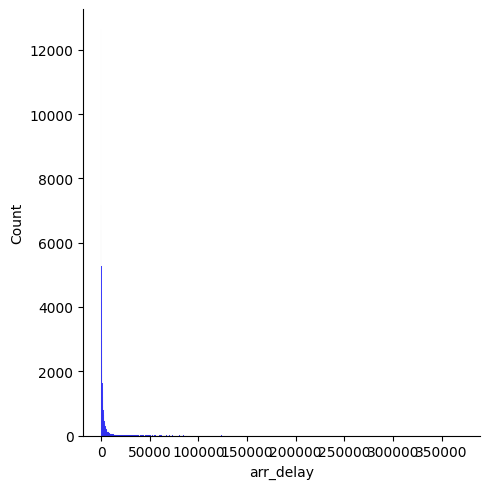

In [12]:
sns.displot(df_reg.arr_delay, color='Blue')

###### Upon looking at the target variable, it is seen to be right-skewed which gives us detail of having most of the values on the left side of the graph. Doing transformation could help make this normally distributed.

###### Transforming the target variable using square root.

In [13]:
df_reg["sqrt_arr_delay"] = np.sqrt(df_reg.arr_delay)

###### Redisplaying the target variable transformed.

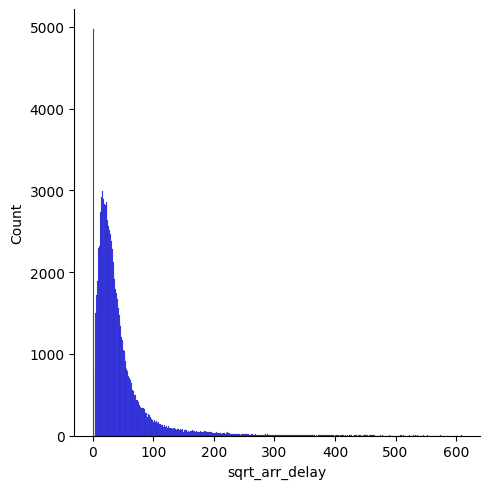

In [14]:
sns.displot(df_reg.sqrt_arr_delay, color='Blue')

##### Limiting the values to be used to become more normally distributed and dropping the original column at the same time

In [15]:
to_drop = df_reg[df_reg['sqrt_arr_delay'] > 100].index
df_reg.drop(to_drop, inplace=True)
df_reg.drop('arr_delay', axis=1, inplace=True)

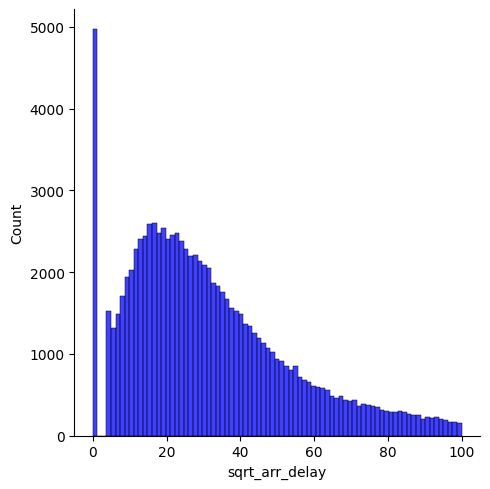

In [16]:
sns.displot(df_reg.sqrt_arr_delay, color='Blue')

##### After doing a sqrt transformation, trimming the data, we now get a better normally distributed target

##### Heatmap of correlation of values

In [17]:
df_reg.corr().style.background_gradient(cmap='Blues', axis=None)

/var/folders/vs/kvk2f5mj5gv4ft6174mc1grm0000gn/T/ipykernel_94925/3012832375.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_reg.corr().style.background_gradient(cmap='Blues', axis=None)


,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,sqrt_arr_delay
arr_flights,1.000000,0.761575,0.724727,0.406891,0.626349,0.242254,0.638760,0.382588,0.293188,0.646306
arr_del15,0.761575,1.000000,0.907260,0.529573,0.803175,0.279638,0.904603,0.108569,0.305709,0.897442
carrier_ct,0.724727,0.907260,1.000000,0.487711,0.568197,0.247267,0.775003,0.102503,0.271576,0.814619
weather_ct,0.406891,0.529573,0.487711,1.000000,0.371283,0.126820,0.404723,0.037779,0.234392,0.563027
nas_ct,0.626349,0.803175,0.568197,0.371283,1.000000,0.244694,0.590372,0.106014,0.281924,0.707103
security_ct,0.242254,0.279638,0.247267,0.126820,0.244694,1.000000,0.213115,0.028929,0.067596,0.220335
late_aircraft_ct,0.638760,0.904603,0.775003,0.404723,0.590372,0.213115,1.000000,0.080589,0.239545,0.810522
arr_cancelled,0.382588,0.108569,0.102503,0.037779,0.106014,0.028929,0.080589,1.000000,0.061189,0.088805
arr_diverted,0.293188,0.305709,0.271576,0.234392,0.281924,0.067596,0.239545,0.061189,1.000000,0.292552
sqrt_arr_delay,0.646306,0.897442,0.814619,0.563027,0.707103,0.220335,0.810522,0.088805,0.292552,1.000000


##### The above table shows a heatmap of the variables available for this dataset. It is shown on the last column which is going to be the target variable containing positive correlations with some of the features.

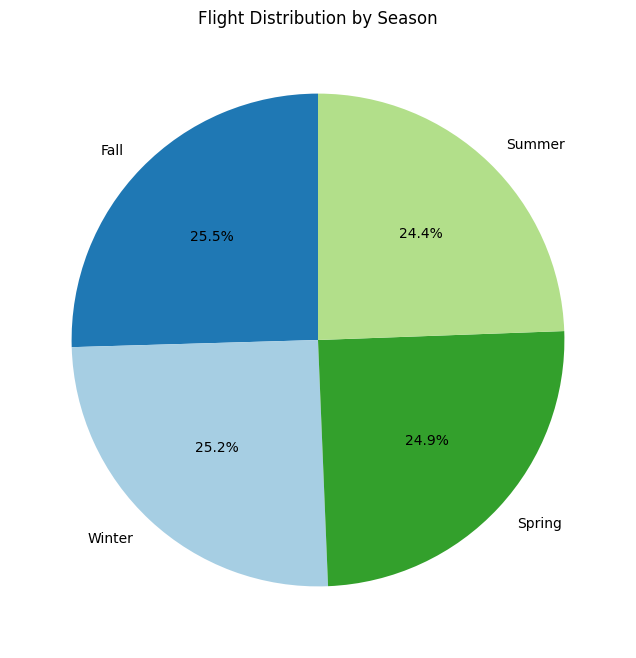

In [18]:
season_counts = df_reg['season'].value_counts()

blue_shades = ['#1f78b4', '#a6cee3', '#33a02c', '#b2df8a']
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=blue_shades)
plt.title('Flight Distribution by Season')
plt.show()

##### The distribution of flight records were almost equally divided. This is because, each record was summarized by airline and by airport having the records almost equal to each season.

##### Making categorical values into dummy variables

In [19]:
season_dummy = pd.get_dummies(df_reg.season, drop_first=True)

In [20]:
df_reg = pd.concat([df_reg, season_dummy], axis=1)

In [21]:
df_reg.drop(columns="season", axis=1, inplace=True)

##### Visual plots of some indepent variables in relation to dependent variables

Text(0.5, 1.0, 'Arrival Delay and Number of Delayed Flight \n(due to delay of same aircraft)')

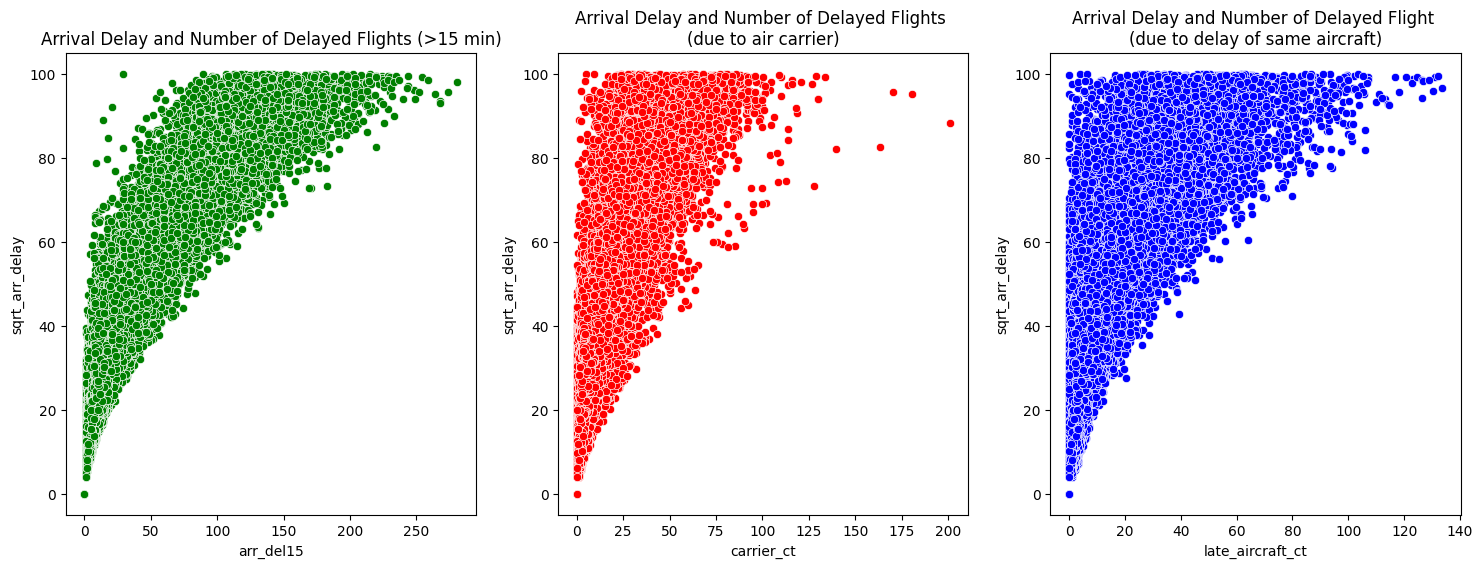

In [22]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.scatterplot(data=df_reg, x='arr_del15', y='sqrt_arr_delay', color='g')
plt.title("Arrival Delay and Number of Delayed Flights (>15 min)")


plt.subplot(132)
sns.scatterplot(data=df_reg, x='carrier_ct', y='sqrt_arr_delay', color='r')
plt.title("Arrival Delay and Number of Delayed Flights \n(due to air carrier)")

plt.subplot(133)
sns.scatterplot(data=df_reg, x='late_aircraft_ct', y='sqrt_arr_delay', color='b')
plt.title("Arrival Delay and Number of Delayed Flight \n(due to delay of same aircraft)")

###### Among the features available, here are some with the most correlation with arrival delay target variable. Generally, they are have a positive relationship with the arrival delay. Since they have a positively correlation, they are assumed to be important features for the prediction model to be identified

##### Saving the cleaned dataset for regression

In [23]:
df_reg.to_csv("./datasets/df_reg_cleaned.csv")

##### Assigning Target Variables and Feature Variables

In [24]:
target = df_reg.sqrt_arr_delay
target_name = 'sqrt_arr_delay'

df_reg.drop(columns=["carrier","airport"], inplace=True, axis=1)

In [25]:
df_reg_feat = df_reg.drop(columns=['sqrt_arr_delay'], axis=1)

##### Splitting the dataset into test and train

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(df_reg_feat, target, test_size=0.2, random_state = 42)

scalers = []
selectors = []
models = []
names = []
r2 = []
rmse = []
select_final = []
model_final = []
scaler_final = []

##### Feature Scalers to be used

In [27]:
#Feature Scaler
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

##### Feature Selections to be used

In [28]:
#Feature Selections
n_feat=8 #declaring the number of features desired
estimator = RandomForestRegressor() 
selfromrf = SelectFromModel(estimator, max_features=n_feat)
estimator = LinearRegression() 
rfe = RFE(estimator, n_features_to_select=n_feat)
selkbest = SelectKBest(f_regression, k=n_feat)

##### Regressor to be used

In [29]:
#Regressor
lrmodel = LinearRegression()
dtmodel = DecisionTreeRegressor()
gbmodel = GradientBoostingRegressor()
xgbmodel = XGBRegressor()

##### Puting everything on a list in preparation for the pipeline

In [30]:
scalers = [standard, minmax, robust]
selectors = [selfromrf,rfe,selkbest]
models = [lrmodel,dtmodel,gbmodel,xgbmodel]
names = [lrmodel.__class__.__name__,dtmodel.__class__.__name__,gbmodel.__class__.__name__,xgbmodel.__class__.__name__]

### The pipeline that runs all the combination of different scalers, selectors, and regression models to find out the best model in predictions

In [31]:
for scaler, select, model in product(scalers, selectors, models):
    pipe = Pipeline(
    [
        ("scaler", scaler),("selector",select),("regressor",model)
    ]
    )
    print(scaler, ' + ', select, ' + ', model)
    pipe.fit(X_train,Y_train)
    Y_pred = pipe.predict(X_test)
    scaler_final.append(scaler)
    select_final.append(select)
    model_final.append(model)
    r2.append(pipe.score(X_test, Y_test))
    rmse.append(mean_squared_error(Y_test, Y_pred, squared = False))


StandardScaler()  +  SelectFromModel(estimator=RandomForestRegressor(), max_features=8)  +  LinearRegression()
StandardScaler()  +  SelectFromModel(estimator=RandomForestRegressor(), max_features=8)  +  DecisionTreeRegressor()
StandardScaler()  +  SelectFromModel(estimator=RandomForestRegressor(), max_features=8)  +  GradientBoostingRegressor()
StandardScaler()  +  SelectFromModel(estimator=RandomForestRegressor(), max_features=8)  +  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_

RobustScaler()  +  RFE(estimator=LinearRegression(), n_features_to_select=8)  +  GradientBoostingRegressor()
RobustScaler()  +  RFE(estimator=LinearRegression(), n_features_to_select=8)  +  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
RobustScaler()  +  SelectKBest(k=8, score_func=<function f_regression

###### Collecting the model results in one dataframe

In [32]:
result_df = pd.DataFrame(zip(scaler_final, select_final, model_final,r2, rmse), columns=['Scaler','Selector','Regressor', 'R^2 Score', 'RMSE Score'])

In [33]:
result_sorted = result_df.sort_values(by=['R^2 Score', 'RMSE Score'], ascending=[False,True])

###### Model Results:

In [34]:
result_sorted

,Scaler,Selector,Regressor,R^2 Score,RMSE Score
7,StandardScaler(),"RFE(estimator=LinearRegression(), n_features_t...","XGBRegressor(base_score=None, booster=None, ca...",0.936673,5.489856
19,MinMaxScaler(),"RFE(estimator=LinearRegression(), n_features_t...","XGBRegressor(base_score=None, booster=None, ca...",0.936661,5.490349
6,StandardScaler(),"RFE(estimator=LinearRegression(), n_features_t...",([DecisionTreeRegressor(criterion='friedman_ms...,0.936115,5.513972
18,MinMaxScaler(),"RFE(estimator=LinearRegression(), n_features_t...",([DecisionTreeRegressor(criterion='friedman_ms...,0.936115,5.513972
11,StandardScaler(),"SelectKBest(k=8, score_func=<function f_regres...","XGBRegressor(base_score=None, booster=None, ca...",0.936102,5.514532
23,MinMaxScaler(),"SelectKBest(k=8, score_func=<function f_regres...","XGBRegressor(base_score=None, booster=None, ca...",0.936090,5.515045
35,RobustScaler(),"SelectKBest(k=8, score_func=<function f_regres...","XGBRegressor(base_score=None, booster=None, ca...",0.936087,5.515197
10,StandardScaler(),"SelectKBest(k=8, score_func=<function f_regres...",([DecisionTreeRegressor(criterion='friedman_ms...,0.935762,5.529185
22,MinMaxScaler(),"SelectKBest(k=8, score_func=<function f_regres...",([DecisionTreeRegressor(criterion='friedman_ms...,0.935758,5.529342
34,RobustScaler(),"SelectKBest(k=8, score_func=<function f_regres...",([DecisionTreeRegressor(criterion='friedman_ms...,0.935757,5.529410


###### Best Model:

In [35]:
result_sorted.head(1)

,Scaler,Selector,Regressor,R^2 Score,RMSE Score
7,StandardScaler(),"RFE(estimator=LinearRegression(), n_features_t...","XGBRegressor(base_score=None, booster=None, ca...",0.936673,5.489856


##### Redoing the best model

In [36]:
pipe = Pipeline(
    [
        ("scaler", result_sorted.iloc[0][0]),("selector",result_sorted.iloc[0][1]),("regressor",result_sorted.iloc[0][2])
    ]
    )
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("Best Model:")
print("Scaler: ", result_sorted.iloc[0][0])
print("Selector: ", result_sorted.iloc[0][1])
print("Regressor: ", result_sorted.iloc[0][2])
print("R2: ", pipe.score(X_test, Y_test))
print("RMSE: ", mean_squared_error(Y_test, Y_pred, squared = False))

Best Model:
Scaler:  StandardScaler()
Selector:  RFE(estimator=LinearRegression(), n_features_to_select=8)
Regressor:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
R2:  0.9366726591619322
RMSE:  5.489856343633176


Text(0.5, 1.0, 'Prediction of Flight Delay Result')

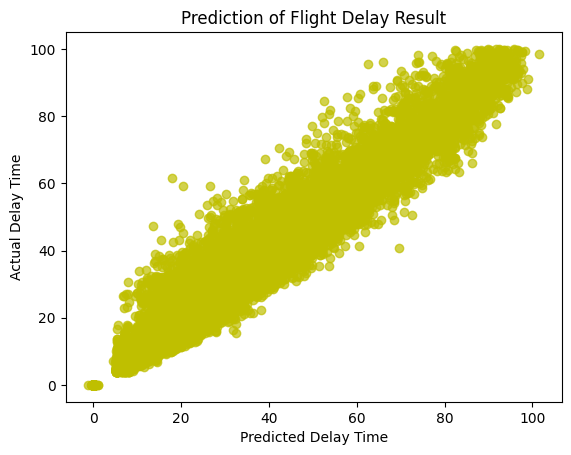

In [37]:
plt.scatter(Y_pred, Y_test, alpha=0.7, color='y') 
plt.xlabel('Predicted Delay Time')
plt.ylabel('Actual Delay Time')
plt.title('Prediction of Flight Delay Result')


##### Majority of the prediction are close to the linear regression line which implies a good prediction was made by the model. Having an R2 of 93.7% shows a great result as the best model for this prediction. Of course, out-of-sample prediction would be helpful in better understanding how the model really behaves in the real world scenario but looking on this prediction results, it can be confirmed how great the performance is for predicting the flight delay time for this dataset.

##### Out-of-Sample Prediction

###### Out of Sample Dataset 1 using January - April 2023 data

In [38]:
df_oos1 = pd.read_csv('./datasets/Airline_Delay_2023.csv')

In [39]:
df_oos1 = data_prep_reg(df_oos1)

In [40]:
target = df_oos1.sqrt_arr_delay
target_name = 'sqrt_arr_delay'

df_oos1.drop(columns=["carrier","airport"], inplace=True, axis=1)
df_oos1_feat = df_oos1.drop(columns=['sqrt_arr_delay'], axis=1)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(df_oos1_feat, target, test_size=0.2, random_state = 42)

In [42]:
pipe = Pipeline(
    [
        ("scaler", result_sorted.iloc[0][0]),("selector",result_sorted.iloc[0][1]),("regressor",result_sorted.iloc[0][2])
    ]
    )
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("Best Model:")
print("Scaler: ", result_sorted.iloc[0][0])
print("Selector: ", result_sorted.iloc[0][1])
print("Regressor: ", result_sorted.iloc[0][2])
print("R2: ", pipe.score(X_test, Y_test))
print("RMSE: ", mean_squared_error(Y_test, Y_pred, squared = False))

Best Model:
Scaler:  StandardScaler()
Selector:  RFE(estimator=LinearRegression(), n_features_to_select=8)
Regressor:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
R2:  0.9243293549593569
RMSE:  6.143321405269351


Text(0.5, 1.0, 'Prediction of Flight Delay Result')

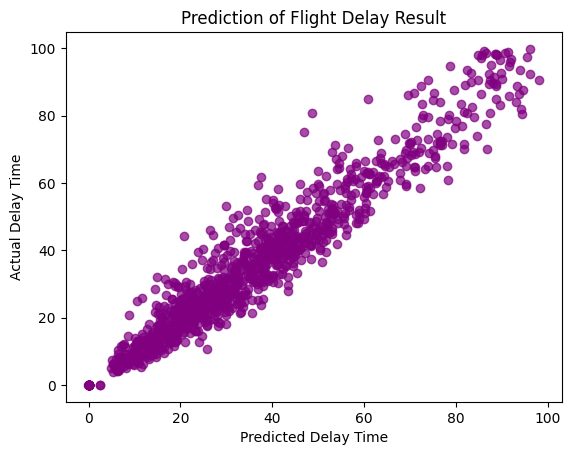

In [43]:
plt.scatter(Y_pred, Y_test, alpha=0.7, color='purple') 
plt.xlabel('Predicted Delay Time')
plt.ylabel('Actual Delay Time')
plt.title('Prediction of Flight Delay Result')


###### Out of Sample Dataset 2 using random data from 2015 - 2017 data

In [44]:
df_oos2 = pd.read_csv('./datasets/Airline_Delay_15-17.csv')

In [45]:
df_oos2 = data_prep_reg(df_oos2)

In [46]:
target = df_oos2.sqrt_arr_delay
target_name = 'sqrt_arr_delay'

df_oos2.drop(columns=["carrier","airport"], inplace=True, axis=1)
df_oos2_feat = df_oos2.drop(columns=['sqrt_arr_delay'], axis=1)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(df_oos2_feat, target, test_size=0.2, random_state = 42)

In [48]:
pipe = Pipeline(
    [
        ("scaler", result_sorted.iloc[0][0]),("selector",result_sorted.iloc[0][1]),("regressor",result_sorted.iloc[0][2])
    ]
    )
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("Best Model:")
print("Scaler: ", result_sorted.iloc[0][0])
print("Selector: ", result_sorted.iloc[0][1])
print("Regressor: ", result_sorted.iloc[0][2])
print("R2: ", pipe.score(X_test, Y_test))
print("RMSE: ", mean_squared_error(Y_test, Y_pred, squared = False))

Best Model:
Scaler:  StandardScaler()
Selector:  RFE(estimator=LinearRegression(), n_features_to_select=8)
Regressor:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
R2:  0.9429941953348224
RMSE:  5.377284389229089


Text(0.5, 1.0, 'Prediction of Flight Delay Result')

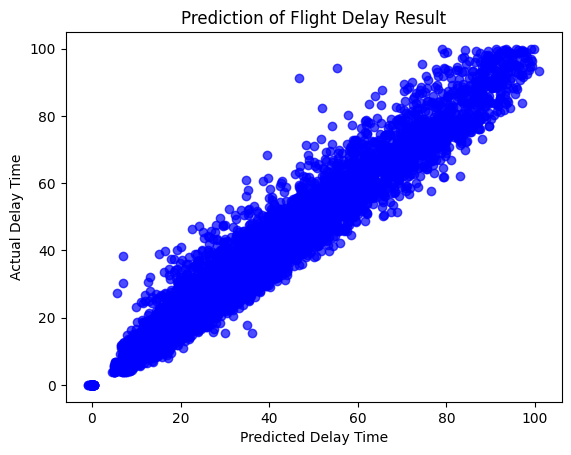

In [49]:
plt.scatter(Y_pred, Y_test, alpha=0.7, color='blue') 
plt.xlabel('Predicted Delay Time')
plt.ylabel('Actual Delay Time')
plt.title('Prediction of Flight Delay Result')

### Out-of-Sample Prediction Result Analysis:
##### Both out-of-sample predictions resulted with a good result. The graph above shows a positive outlook of predicting the target variables accurately. In terms of their respective R2 scores, set 1 (Jan-Apr 2023) produced a percent lower (92.43%) comparec to the accuracy made from the original dataset (93.67%) while set 2 (2015-2017) garnered a percent higher (94.30%) than the original dataset accuracy. In terms of their RMSE scores, the same results were retrieved having set 1 with a higher value (6.14) while set 2 getting a lower value (5.38) which means that set 2 gets to have the better RMSE value. 

###### Overall, it can be said that both tests still provided great results which implies that the prediction model used is appropriate in identifying the number of minutes an airline could be delayed in each month.


## B. Classification

###### Importing necessary libraries

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

###### Loading the dataset

In [51]:
df_clf = pd.read_csv('./datasets/Airline_Delay_18-22.csv')

###### Dropping unncessary columns and null values

In [52]:
df_clf.drop(columns=["carrier","airport","year","carrier_name","airport_name","carrier_delay","weather_delay","nas_delay","security_delay","late_aircraft_delay"], inplace=True)

In [53]:
df_clf = df_clf.dropna()

###### Data transformation for month into season

In [54]:
df_clf['season'] = df_clf['month'].apply(categorize_season)
df_clf.drop(columns=["month"], inplace=True)


###### Creating dummy values for categorical data (season)

In [55]:
season_dummy = pd.get_dummies(df_clf.season, drop_first=True)

In [56]:
df_clf = pd.concat([df_clf, season_dummy], axis=1)

In [57]:
df_clf.drop(columns="season", axis=1, inplace=True)

###### Transforming target numerical variable into categorical variable (binary)

In [58]:
df_clf['delayed'] = df_clf.arr_delay.apply(lambda x:1 if x>100 else 0)

###### Trimming the dataset to have a balanced values of binary class

In [59]:
to_drop = df_clf[df_clf['arr_delay'] > 300].index
df_clf.drop(to_drop, inplace=True)

In [60]:
df_clf.drop(columns=["arr_delay"], inplace=True)

In [61]:
df_clf['delayed'].value_counts()

1    14177
0    13204
Name: delayed, dtype: int64

###### Heatmap for correlation

In [62]:
df_clf.corr().style.background_gradient(cmap='Greens', axis=None)

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,Spring,Summer,Winter,delayed
arr_flights,1.000000,0.460454,0.414846,0.113595,0.251672,0.041296,0.189431,0.552312,0.116727,0.090670,-0.046976,-0.090112,0.325820
arr_del15,0.460454,1.000000,0.700098,0.240714,0.659660,0.091309,0.561377,0.019828,0.097932,-0.070723,0.006869,0.037185,0.725839
carrier_ct,0.414846,0.700098,1.000000,0.053560,0.125632,0.030382,0.131749,0.039865,0.065249,-0.033717,0.005566,-0.004761,0.529145
weather_ct,0.113595,0.240714,0.053560,1.000000,0.070953,0.000895,0.038183,-0.004808,0.053358,-0.047682,0.065043,0.018289,0.231157
nas_ct,0.251672,0.659660,0.125632,0.070953,1.000000,0.033251,0.168848,0.004904,0.066864,-0.044862,-0.005714,0.042265,0.399029
security_ct,0.041296,0.091309,0.030382,0.000895,0.033251,1.000000,0.040109,0.013444,0.013688,-0.009401,0.006943,0.000445,0.052178
late_aircraft_ct,0.189431,0.561377,0.131749,0.038183,0.168848,0.040109,1.000000,-0.013682,0.044365,-0.052460,-0.010304,0.039549,0.458806
arr_cancelled,0.552312,0.019828,0.039865,-0.004808,0.004904,0.013444,-0.013682,1.000000,0.047231,0.193675,-0.064170,-0.056579,0.010827
arr_diverted,0.116727,0.097932,0.065249,0.053358,0.066864,0.013688,0.044365,0.047231,1.000000,0.018952,-0.021305,0.006248,0.064048
Spring,0.090670,-0.070723,-0.033717,-0.047682,-0.044862,-0.009401,-0.052460,0.193675,0.018952,1.000000,-0.322587,-0.343835,-0.062814


##### Saving the cleaned dataset for classification

In [63]:
df_clf.to_csv("./datasets/df_clf_cleaned.csv")

###### Assigning target and feature variables

In [64]:
target = df_clf.delayed
target_name = 'delayed'

df_clf_feat = df_clf.drop(columns=['delayed'], axis=1)

###### Splitting the dataset

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(df_clf_feat, target, test_size=0.2, random_state = 42)

scalers = []
selectors = []
models = []

scores = []

select_final = []
model_final = []
scaler_final = []

##### Feature Scalers to be used

In [66]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

##### Feature Selections to be used

In [67]:
n_feat=8 #declaring the number of features desired
estimator = RandomForestClassifier() 
selfromrf = SelectFromModel(estimator, max_features=n_feat)
estimator = LogisticRegression() 
rfe = RFE(estimator, n_features_to_select=n_feat)
selkbest = SelectKBest(score_func=f_classif, k=n_feat)

##### Classifiers to be used

In [68]:
lr =LogisticRegression()
knn = KNeighborsClassifier(3)
linear_svc = SVC(kernel="linear", C=0.01, probability=True)
dtc = DecisionTreeClassifier(max_depth=5)
gnbs = GaussianNB()

##### Puting everything on a list in preparation for the pipeline

In [69]:
scalers = [standard, minmax, robust]
selectors = [selfromrf,rfe,selkbest]
models = [lr,knn,linear_svc,dtc,gnbs,
          RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
          AdaBoostClassifier(), XGBClassifier()]
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", 
         "Decision Tree", "Naive Bayes", "Random Forest","AdaBoost", "XGBoost"]

### The pipeline that runs all the combination of different scalers, selectors, and regression models to find out the best model in predictions

In [70]:
for scaler, select, model in product(scalers, selectors, models):
    pipe = Pipeline(
    [
        ("scaler", scaler),("selector",select),("classifier",model)
    ]
    )
    print(scaler, ' + ', select, ' + ', model)
    pipe.fit(X_train,Y_train)
    scores.append(pipe.score(X_test, Y_test))
    scaler_final.append(scaler)
    select_final.append(select)
    model_final.append(model)
    print("model score: %.3f" % pipe.score(X_test, Y_test))
    print("\n -----------------------------------------------------------------------------------")


StandardScaler()  +  SelectFromModel(estimator=RandomForestClassifier(), max_features=8)  +  LogisticRegression()
model score: 0.871

 -----------------------------------------------------------------------------------
StandardScaler()  +  SelectFromModel(estimator=RandomForestClassifier(), max_features=8)  +  KNeighborsClassifier(n_neighbors=3)
model score: 0.843

 -----------------------------------------------------------------------------------
StandardScaler()  +  SelectFromModel(estimator=RandomForestClassifier(), max_features=8)  +  SVC(C=0.01, kernel='linear', probability=True)
model score: 0.870

 -----------------------------------------------------------------------------------
StandardScaler()  +  SelectFromModel(estimator=RandomForestClassifier(), max_features=8)  +  DecisionTreeClassifier(max_depth=5)
model score: 0.869

 -----------------------------------------------------------------------------------
StandardScaler()  +  SelectFromModel(estimator=RandomForestClassifie

model score: 0.851

 -----------------------------------------------------------------------------------
MinMaxScaler()  +  SelectFromModel(estimator=RandomForestClassifier(), max_features=8)  +  RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
model score: 0.866

 -----------------------------------------------------------------------------------
MinMaxScaler()  +  SelectFromModel(estimator=RandomForestClassifier(), max_features=8)  +  AdaBoostClassifier()
model score: 0.871

 -----------------------------------------------------------------------------------
MinMaxScaler()  +  SelectFromModel(estimator=RandomForestClassifier(), max_features=8)  +  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, 

model score: 0.863

 -----------------------------------------------------------------------------------
RobustScaler()  +  RFE(estimator=LogisticRegression(), n_features_to_select=8)  +  LogisticRegression()
model score: 0.872

 -----------------------------------------------------------------------------------
RobustScaler()  +  RFE(estimator=LogisticRegression(), n_features_to_select=8)  +  KNeighborsClassifier(n_neighbors=3)
model score: 0.852

 -----------------------------------------------------------------------------------
RobustScaler()  +  RFE(estimator=LogisticRegression(), n_features_to_select=8)  +  SVC(C=0.01, kernel='linear', probability=True)
model score: 0.873

 -----------------------------------------------------------------------------------
RobustScaler()  +  RFE(estimator=LogisticRegression(), n_features_to_select=8)  +  DecisionTreeClassifier(max_depth=5)
model score: 0.873

 -----------------------------------------------------------------------------------
Rob

###### Collecting the model results in one dataframe

In [71]:
result_df = pd.DataFrame(zip(scaler_final, select_final, model_final,scores), columns=['Scaler','Selector','Classifier', 'Accuracy Score'])

In [72]:
result_sorted = result_df.sort_values(by=['Accuracy Score'], ascending=[False])

###### Model Results:

In [73]:
result_sorted.sort_values(by=['Accuracy Score'], ascending=[False])

,Scaler,Selector,Classifier,Accuracy Score
63,RobustScaler(),"RFE(estimator=LogisticRegression(), n_features...","XGBClassifier(base_score=None, booster=None, c...",0.874749
62,RobustScaler(),"RFE(estimator=LogisticRegression(), n_features...","(DecisionTreeClassifier(max_depth=1, random_st...",0.874384
59,RobustScaler(),"RFE(estimator=LogisticRegression(), n_features...",DecisionTreeClassifier(max_depth=5),0.873106
32,MinMaxScaler(),"RFE(estimator=LogisticRegression(), n_features...",LogisticRegression(),0.872923
58,RobustScaler(),"RFE(estimator=LogisticRegression(), n_features...","SVC(C=0.01, kernel='linear', probability=True)",0.872741
...,...,...,...,...
25,MinMaxScaler(),SelectFromModel(estimator=RandomForestClassifi...,KNeighborsClassifier(n_neighbors=3),0.842980
17,StandardScaler(),SelectKBest(k=8),KNeighborsClassifier(n_neighbors=3),0.842797
1,StandardScaler(),SelectFromModel(estimator=RandomForestClassifi...,KNeighborsClassifier(n_neighbors=3),0.842615
65,RobustScaler(),SelectKBest(k=8),KNeighborsClassifier(n_neighbors=3),0.841336


###### Best Model:

In [74]:
result_sorted.head(1)

,Scaler,Selector,Classifier,Accuracy Score
63,RobustScaler(),"RFE(estimator=LogisticRegression(), n_features...","XGBClassifier(base_score=None, booster=None, c...",0.874749


##### Redoing the best model

In [75]:
pipe = Pipeline(
    [
        ("scaler", result_sorted.iloc[0][0]),("selector",result_sorted.iloc[0][1]),("classifier",result_sorted.iloc[0][2])
    ]
    )
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("Best Model:")
print("Scaler: ", result_sorted.iloc[0][0])
print("Selector: ", result_sorted.iloc[0][1])
print("Classifier: ", result_sorted.iloc[0][2])
print(pipe.score(X_test, Y_test))

Best Model:
Scaler:  RobustScaler()
Selector:  RFE(estimator=LogisticRegression(), n_features_to_select=8)
Classifier:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.8747489501551945


##### Plotting the prediction result of the best model

<Axes: xlabel='Predicted', ylabel='Actual'>

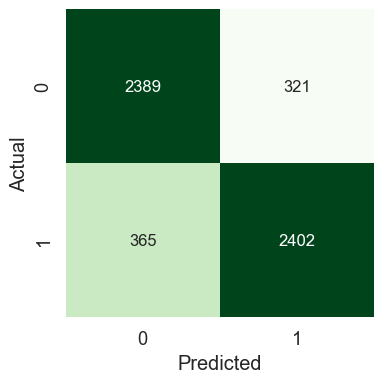

In [76]:
data = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Greens")

##### Looking at the confusion matrix, it shows that the darker the color, the higher the value is. In this case, majority values are from the correct prediction of the actual having 2389 with correct 0 and 2402 of correct 1. There are few incorrect predictions but as mentioned in the accuracy report it still produced 87.47% prediction accuracy.


##### Classification report

In [77]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2710
           1       0.88      0.87      0.88      2767

    accuracy                           0.87      5477
   macro avg       0.87      0.87      0.87      5477
weighted avg       0.87      0.87      0.87      5477



#####  Overall, the performance of the best model created produced 87.47%. This also gets high precision, recall, and f1-score for both classes 0 and 1, indicating that it performs well in predicting these classes. In the end, we can still prove that the performance of this model can be utilized further to other datasets for better analysis and understanding of how the model behaves on out-of-sample predictions.


##### Out-of-Sample Prediction

###### Out of Sample Dataset 1 using January - April 2023 data

In [78]:
df_oos3 = pd.read_csv('./datasets/Airline_Delay_2023.csv')

In [79]:
df_oos3 = data_prep_clf(df_oos3)

In [80]:
df_oos3

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,Winter,delayed
1,46.0,5.0,3.63,0.61,0.76,0.0,0.00,0.0,1.0,0,1
2,61.0,5.0,0.68,0.07,3.32,0.0,0.93,0.0,1.0,0,1
5,17.0,3.0,2.89,0.00,0.11,0.0,0.00,0.0,0.0,0,1
6,51.0,8.0,2.91,0.00,5.09,0.0,0.00,0.0,0.0,0,1
13,9.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6135,31.0,2.0,1.00,0.00,1.00,0.0,0.00,0.0,2.0,1,0
6136,8.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1,0
6139,1.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1,0
6144,30.0,3.0,1.00,0.00,0.25,0.0,1.75,0.0,1.0,1,1


In [81]:
df_oos3['delayed'].value_counts()

1    699
0    464
Name: delayed, dtype: int64

###### Assigning target and feature variables

In [82]:
target = df_oos3.delayed
target_name = 'delayed'

df_oos3_feat = df_oos3.drop(columns=['delayed'], axis=1)

###### Splitting the dataset

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(df_oos3_feat, target, test_size=0.2, random_state = 42)

scalers = []
selectors = []
models = []

scores = []

select_final = []
model_final = []
scaler_final = []

In [84]:
pipe = Pipeline(
    [
        ("scaler", result_sorted.iloc[0][0]),("selector",result_sorted.iloc[0][1]),("classifier",result_sorted.iloc[0][2])
    ]
    )
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("Best Model:")
print("Scaler: ", result_sorted.iloc[0][0])
print("Selector: ", result_sorted.iloc[0][1])
print("Classifier: ", result_sorted.iloc[0][2])
print(pipe.score(X_test, Y_test))

Best Model:
Scaler:  RobustScaler()
Selector:  RFE(estimator=LogisticRegression(), n_features_to_select=8)
Classifier:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.8412017167381974


##### Plotting the prediction result of the best model

<Axes: xlabel='Predicted', ylabel='Actual'>

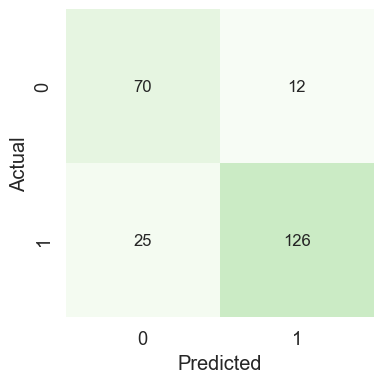

In [85]:
data = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Greens")

##### Classification report

In [86]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        82
           1       0.91      0.83      0.87       151

    accuracy                           0.84       233
   macro avg       0.82      0.84      0.83       233
weighted avg       0.85      0.84      0.84       233



###### Out of Sample Dataset 2 using 2015 - 2017 data

In [87]:
df_oos4 = pd.read_csv('./datasets/Airline_Delay_15-17.csv')

In [88]:
df_oos4 = data_prep_clf(df_oos4)

In [89]:
df_oos4

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,Spring,Summer,Winter,delayed
1,78.0,6.0,0.72,0.00,1.00,0.0,4.28,0.0,0.0,0,0,1,1
2,17.0,2.0,2.00,0.00,0.00,0.0,0.00,1.0,0.0,0,0,1,0
29,10.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,0,0,1,0
50,63.0,6.0,2.80,0.00,2.08,0.0,1.12,0.0,0.0,0,0,1,1
53,14.0,2.0,0.39,0.00,0.02,0.0,1.59,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38157,5.0,3.0,0.00,0.00,3.00,0.0,0.00,0.0,0.0,0,0,1,0
38158,27.0,2.0,1.60,0.00,0.40,0.0,0.00,0.0,0.0,0,0,1,1
38170,31.0,6.0,0.11,4.45,0.00,0.0,1.43,0.0,0.0,0,0,1,1
38173,31.0,5.0,2.26,0.00,0.02,0.0,2.72,0.0,0.0,0,0,1,1


In [90]:
df_oos4['delayed'].value_counts()

1    3959
0    2720
Name: delayed, dtype: int64

###### Assigning target and feature variables

In [91]:
target = df_oos4.delayed
target_name = 'delayed'

df_oos4_feat = df_oos4.drop(columns=['delayed'], axis=1)

###### Splitting the dataset

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(df_oos4_feat, target, test_size=0.2, random_state = 42)

scalers = []
selectors = []
models = []

scores = []

select_final = []
model_final = []
scaler_final = []

In [93]:
pipe = Pipeline(
    [
        ("scaler", result_sorted.iloc[0][0]),("selector",result_sorted.iloc[0][1]),("classifier",result_sorted.iloc[0][2])
    ]
    )
pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)
print("Best Model:")
print("Scaler: ", result_sorted.iloc[0][0])
print("Selector: ", result_sorted.iloc[0][1])
print("Classifier: ", result_sorted.iloc[0][2])
print(pipe.score(X_test, Y_test))

Best Model:
Scaler:  RobustScaler()
Selector:  RFE(estimator=LogisticRegression(), n_features_to_select=8)
Classifier:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.8712574850299402


##### Plotting the prediction result of the best model

<Axes: xlabel='Predicted', ylabel='Actual'>

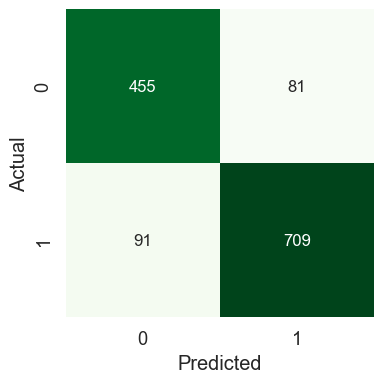

In [94]:
data = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Greens")

##### Classification report

In [95]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       536
           1       0.90      0.89      0.89       800

    accuracy                           0.87      1336
   macro avg       0.87      0.87      0.87      1336
weighted avg       0.87      0.87      0.87      1336

